# <center> TP3 / Le modèle de Black-Scholes (schéma implicite) </center>
<div>
    <center> RAZAFINDRAZAKA Henintsoa </center>
    <center> Wang James </center>
    <center> ____________</center>
    <center> ING5 BDA GR02 </center>
    <center> 08/11/2020 </center>
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import numpy as np
import math
import time

## 1. Initialisations

### 1.1. Initialisation des paramètres numériques

In [2]:
M = 150      # Nombre de points de maillage d'actifs
N = 200      # Nombre de points de maillage en temps
Szero = 0    # valeur extreme
Smax = 150   # valeur extreme

### 1.2. Initialisation des paramètres financiers

In [3]:
S = 50          # valeur du sous-jacent
K = 50          # Strike
r = 0.05        # Taux d'intérêt sans risque
sigma = 0.2     # Volatilité
T = 3           # Maturité

### 1.3. Initialisation du maillage et de la matrice du système linéaire

In [4]:
u = np.zeros((N, M))

dS = Smax / M
dt = T/N
Smesh = np.arange(0, Smax, dS)
Tmesh = np.arange(T, 0, -dt)

u[0,:] = np.maximum(K-Smesh, 0)
u[:,0] = K*np.exp(-r*(T-Tmesh))
u[:,M-1] = 0

def A(i):
    return 0.5 * dt * (r * i - sigma**2 * i**2)

def B(i):
    return 1 + (sigma**2 * i**2 + r)*dt

def C(i):
    return -0.5 * dt * (sigma**2 * i**2 + r * i)

### 1.4. Construction de la matrice tri-diagonale et son inverse 

In [5]:
Acoeffs = np.zeros((M,))
Bcoeffs = np.zeros((M,))
Ccoeffs = np.zeros((M,))

for i in range(M):
    Acoeffs[i] = A(i)
    Bcoeffs[i] = B(i)
    Ccoeffs[i] = C(i)
    
Tri = np.diag(Acoeffs[1:M], -1) + np.diag(Bcoeffs) + np.diag(Ccoeffs[0:M-1], 1) 
Tri_inv = np.linalg.inv(Tri)


## 2. Boucle en temps et schéma implicite

In [6]:
for j in range(N-1):
    temp = np.zeros((M,))
    temp[0] = A(0) * u[j+1][0]
    temp[M-1] = C(M) * u[j+1][M-1]
    RHS = u[j,:] - temp
    temp = Tri_inv.dot(RHS)
    u[j+1,1:M-1] = temp[1:M-1]

print("u = \n",u)

u = 
 [[5.00000000e+01 4.90000000e+01 4.80000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.99625141e+01 4.89625281e+01 4.79625281e+01 ... 5.02290248e-28
  2.95185166e-28 0.00000000e+00]
 [4.99250562e+01 4.89250843e+01 4.79250843e+01 ... 1.53976271e-26
  9.07547796e-27 0.00000000e+00]
 ...
 [4.31323375e+01 4.21347430e+01 4.11347266e+01 ... 4.25583797e-04
  2.74216874e-04 0.00000000e+00]
 [4.31000004e+01 4.21024164e+01 4.11023998e+01 ... 4.36446588e-04
  2.81223041e-04 0.00000000e+00]
 [4.30676875e+01 4.20701140e+01 4.10700972e+01 ... 4.47473991e-04
  2.88335524e-04 0.00000000e+00]]


## 3. Visualisation graphique des résultats

### 3.1. Figure 1: Iso-valeurs de Put

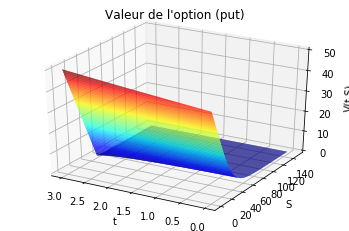

In [7]:
X, Y = np.meshgrid(Tmesh, Smesh)

ax = plt.axes(projection='3d')
plt.gca().invert_xaxis()
ax.set_xlabel('t')
ax.set_ylabel('S')
ax.set_zlabel('V(t,S)')
ax.plot_surface(X, Y, u.T, rstride=1, cstride=1, cmap='jet')
ax.set_title("Valeur de l'option (put)");

### 3.2. Figure 2: Variations 1D du Put

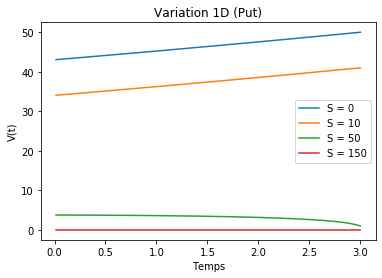

In [8]:
plt.plot(Tmesh, u[:,0], label='S = 0')
plt.plot(Tmesh, u[:,9], label='S = 10')
plt.plot(Tmesh, u[:,49], label='S = 50')
plt.plot(Tmesh, u[:,149], label='S = 150')
plt.xlabel('Temps')
plt.ylabel('V(t)')
plt.legend()
plt.title('Variation 1D (Put)')
plt.show()

## 4. Implémentation d'un Call européen

### 4.1. Initialisation des paramètres numériques et Financiers

In [9]:
M = 150        # Nombre de points de maillage d'actifs
N = 200        # Nombre de points de maillage en temps
Szero = 0      # valeur extreme
Smax = 150     # valeur extreme

S = 50         # valeur du sous-jacent
K = 50         # Strike
r = 0.05       # Taux d'intérêt sans risque
sigma = 0.2    # Volatilité
T = 3          # Maturité

### 4.2. Initialisation du maillage et construction de la matrice du système linéaire

In [10]:
u = np.zeros((N, M))

dS = Smax / M
dt = T/N
Smesh = np.arange(0, Smax, dS)
Tmesh = np.arange(T, 0, -dt)

u[0,:] = np.maximum(Smesh-K, 0)
u[:,0] = 0
u[:,M-1] = 100

def A(i):
    return 0.5 * dt * (r * i - sigma**2 * i**2)

def B(i):
    return 1 + (sigma**2 * i**2 + r)*dt

def C(i):
    return -0.5 * dt * (sigma**2 * i**2 + r * i)

Acoeffs = np.zeros((M,))
Bcoeffs = np.zeros((M,))
Ccoeffs = np.zeros((M,))

for i in range(M):
    Acoeffs[i] = A(i)
    Bcoeffs[i] = B(i)
    Ccoeffs[i] = C(i)
    
Tri = np.diag(Acoeffs[1:M], -1) + np.diag(Bcoeffs) + np.diag(Ccoeffs[0:M-1], 1) 
Tri_inv = np.linalg.inv(Tri)


### 4.3. Boucle en temps et schéma implicite

In [11]:
for j in range(N-1):
    temp = np.zeros((M,))
    temp[0] = A(0) * u[j+1][0]
    temp[M-1] = C(M) * u[j+1][M-1]
    RHS = u[j,:] - temp
    temp = Tri_inv.dot(RHS)
    u[j+1,1:M-1] = temp[1:M-1]

print("u = \n",u)

u = 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.70000000e+01
  9.80000000e+01 1.00000000e+02]
 [0.00000000e+00 3.55017618e-53 5.26662061e-50 ... 9.74997552e+01
  9.87162976e+01 1.00000000e+02]
 [0.00000000e+00 1.37833214e-51 1.99213500e-48 ... 9.77410824e+01
  9.89227263e+01 1.00000000e+02]
 ...
 [0.00000000e+00 1.73194327e-15 2.60655093e-13 ... 9.87708575e+01
  9.96082862e+01 1.00000000e+02]
 [0.00000000e+00 1.92354832e-15 2.87706439e-13 ... 9.87720369e+01
  9.96090483e+01 1.00000000e+02]
 [0.00000000e+00 2.13488038e-15 3.17354297e-13 ... 9.87732109e+01
  9.96098070e+01 1.00000000e+02]]


### 4.4. Visualisation graphique des résultats

#### 4.4.1. Figure 1: Iso-valeurs de Call

(200,)
(150,)
(200, 150)


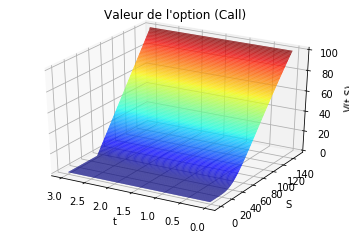

In [20]:
X, Y = np.meshgrid(Tmesh, Smesh)
print(Tmesh.shape)
print(Smesh.shape)
print(u.shape)
ax = plt.axes(projection='3d')
plt.gca().invert_xaxis()
ax.set_xlabel('t')
ax.set_ylabel('S')
ax.set_zlabel('V(t,S)')
ax.plot_surface(X, Y, u.T, rstride=1, cstride=1, cmap='jet')
ax.set_title("Valeur de l'option (Call)");

#### 4.4.2. Figure 2: Variations 1D du Call

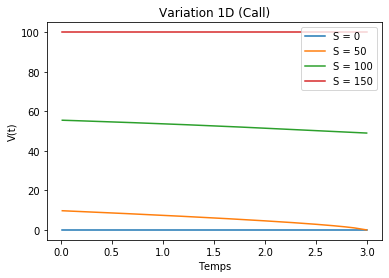

In [13]:
plt.plot(Tmesh, u[:,0], label='S = 0')
plt.plot(Tmesh, u[:,49], label='S = 50')
plt.plot(Tmesh, u[:,99], label='S = 100')
plt.plot(Tmesh, u[:,149], label='S = 150')
plt.xlabel('Temps')
plt.ylabel('V(t)')
plt.legend()
plt.title('Variation 1D (Call)')
plt.show()